<a href="https://colab.research.google.com/github/George-Nyamao/keras_mnist_inference/blob/master/Keras_mnist_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Google Drive to Save Model**

In [1]:
# Load the Drive helper and mount
from google.colab import drive
from os.path import join
ROOT = "/content/drive/"
drive.mount(ROOT)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
# My Google drive path
GDRIVE_PATH = 'My Drive/ColabSaves/'
FILEPATH = join(ROOT, GDRIVE_PATH)
print("File Path : ", FILEPATH)

File Path :  /content/drive/My Drive/ColabSaves/


**MNIST Handwriting Using CNN and Keras**

In [0]:
# Import libraries
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [4]:
# Load raw data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


The images are of 28x28 pixels,and therefore we need to shape them as 1x28x28 or 28x28x1, where the "1" indicates it's a single channel since the images are in grayscal. Color images would have had a "3" instead.

In [0]:
from tensorflow.keras import backend as k

if k.image_data_format() == 'channels_first':
    x_train = train_images.reshape(train_images.shape[0], 1, 28, 28)
    x_test = test_images.reshape(test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
    x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

We then convert them to float and scale them between 0 and 1 by dividing by 255.

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

We also convert our train and test labels to categorical in one-hot format.

In [0]:
y_train = tensorflow.keras.utils.to_categorical(train_labels, 10)
y_test = tensorflow.keras.utils.to_categorical(test_labels, 10)

Print out one sample

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


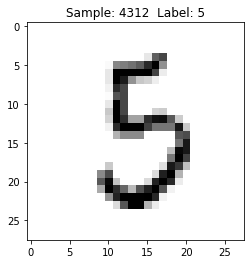

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(y_train[num])  
    #Print the label converted back to a number
    label = y_train[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = x_train[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(4312)

**Build Model**

We borrow the best model from our Keras-cnn-mnist-tuning.ipynb. Our first model will have two Conv2D layers, one MaxPooling2D layer, two Dropout layers, a Flatten and then two Dense layers. We will use a batch size of 32 and the default learning rate of 0.001.

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
# Compose the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 - 7s - loss: 0.1812 - accuracy: 0.9454 - val_loss: 0.0475 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 - 7s - loss: 0.0772 - accuracy: 0.9777 - val_loss: 0.0364 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 - 7s - loss: 0.0598 - accuracy: 0.9821 - val_loss: 0.0322 - val_accuracy: 0.9899
Epoch 4/10
1875/1875 - 7s - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0317 - val_accuracy: 0.9903
Epoch 5/10
1875/1875 - 7s - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0275 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 - 7s - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 - 7s - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0265 - val_accuracy: 0.9928
Epoch 8/10
1875/1875 - 7s - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.0279 - val_accuracy: 0.9930
Epoch 9/10
1875/1875 - 7s - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0287 - val_accuracy: 0.9919
Epoch 10/10
1875/1875 - 7s - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.0254 - 

In [0]:
# Save the model
filepath = FILEPATH + 'keras_mnist_cnn_model.h5'
model.save(filepath)

**Load Saved Model**

In [16]:
# Load the saved model
my_model = tensorflow.keras.models.load_model(filepath)

# Model summary
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [17]:
# Check it's accuracy
loss, acc = my_model.evaluate(x_test,  y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

313/313 - 1s - loss: 0.0254 - accuracy: 0.9930
Restored model, accuracy: 99.30%


**Make Predictions**

Predicted labels are: [3 6 1 1 8]


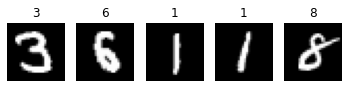

In [22]:
# Make random predictions
import numpy as np
import random

num_samples = 5
indices = random.sample(range(test_images.shape[0] - 1), num_samples)
images = test_images[indices]/255
labels = test_labels[indices]

for i in range(num_samples):
    plt.subplot(1,num_samples,i+1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

prediction = my_model.predict(images.reshape(num_samples, 28, 28, 1))
prediction = np.array(prediction)
predicted_label = prediction.argmax(axis=1)
print('Predicted labels are: {}'.format(predicted_label))